R²: 0.9362
RMSE: 72.96


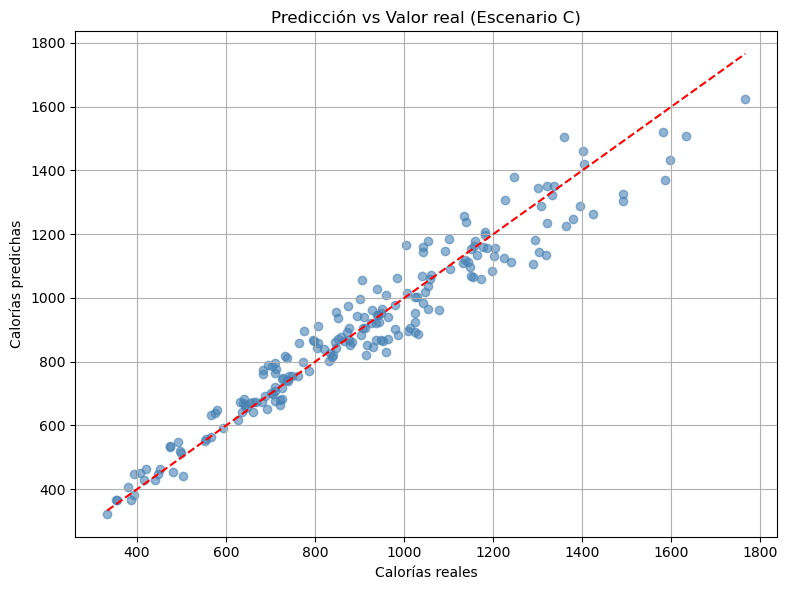

In [ ]:
# Escenario C: Predicción usando solo variables de sesión (sin info del usuario)

import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Cargar el dataset
df = pd.read_csv("archivo_gym_members_exercise_tracking_version2.csv")

# Variables seleccionadas para el Escenario C
variables_C = [
    'Avg_BPM', 'Max_BPM', 'Resting_BPM',
    'Session_Duration (hours)',
    'Workout_Cardio', 'Workout_HIIT',
    'Workout_Strength', 'Workout_Yoga'
]

# Eliminar filas con valores nulos
df_c = df.dropna(subset=variables_C + ['Calories_Burned'])

# Definir X e y
X = df_c[variables_C]
y = df_c['Calories_Burned']

# Escalado de variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# División en conjunto de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Entrenar modelo Gradient Boosting
model = GradientBoostingRegressor(random_state=42)
model.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_test)

# Evaluación
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f"R²: {r2:.4f}")
print(f"RMSE: {rmse:.2f}")

# Visualización: predicción vs valor real
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6, color='steelblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
plt.title('Predicción vs Valor real (Escenario C)')
plt.xlabel('Calorías reales')
plt.ylabel('Calorías predichas')
plt.grid(True)
plt.tight_layout()
plt.show()

# Comparativa de modelos
models = {
    "Regresión Lineal": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

# Entrenar y evaluar los modelos
results = []
for name, m in models.items():
    m.fit(X_train, y_train)
    y_pred = m.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    results.append((name, r2, rmse))

# Mostrar resultados
df_results = pd.DataFrame(results, columns=["Modelo", "R2", "RMSE"])
print("\nComparativa de modelos en el Escenario C:")
print(df_results)
